<h3>Visualization</h3>

<p>This chapter is presented in three sections. The first introduces you to the general concepts
of programming visualizations with pandas, emphasizing the process of creating timeseries
charts. We will also dive into techniques to label axes and create legends, colors,
line styles, and markets.</p><p>
The second part of the chapter will then focus on the many types of data visualizations
commonly used in pandas programs and data sciences, including:</p><ul>
<li>Bar plots</li>
<li>Histograms</li>
<li>Box and whisker charts</li>
<li>Area plots</li>
<li>Scatter plots</li>
<li>Density plots</li>
<li>Scatter plot matrixes</li>
<li>Heatmaps</li>
    </ul><p>
The final section will briefly look at creating composite plots by dividing plots into
subparts and drawing multiple plots within a single graphical canvas.</p>

In [2]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# used for seeding random number sequences
seedval = 111111

# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt

# we want our plots inline
%matplotlib inline

<p>The %matplotlib inline line is the statement that tells matplotlib to produce inline
graphics. This will make the resulting graphs appear either inside your IPython notebook
or IPython session.</p><p>
All examples will seed the random number generator with 111111, so that the graphs
remain the same every time they run, and so that the reader can reproduce the same charts
as in the book.</p>

<p>The pandas library itself performs data manipulation. It does not provide data visualization
capabilities itself. The visualization of data in pandas data structures is handed off by
pandas to other robust visualization libraries that are part of the Python ecosystem, most
commonly, matplotlib, which is what we will use in this chapter.</p><p>
All of the visualizations and techniques covered in this chapter can be performed without
pandas. These techniques are all available independently in matplotlib. pandas tightly
integrates with matplotlib, and by doing this, it is very simple to go directly from pandas
data to a matplotlib visualization without having to work with intermediate forms of data.</p><p>
pandas does not draw the graphs, but it will tell matplotlib how to draw graphs using
pandas data, taking care of many details on your behalf, such as automatically selecting
Series for plots, labeling axes, creating legends, and defaulting color. Therefore, you
often have to write very little code to create stunning visualizations.</p>

<h3>Creating time-series charts with .plot()</h3>

One of the most common data visualizations created, is of the time-series data. Visualizing
a time series in pandas is as simple as calling .plot() on a DataFrame or Series object.
To demonstrate, the following creates a time series representing a random walk of values
over time, akin to the movements in the price of a stock:

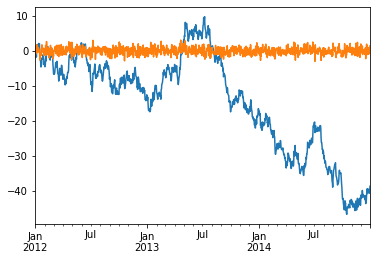

In [12]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index=pd.date_range('2012-01-01','2014-12-31'))
walk_ts = s.cumsum()

# this plots the walk - just that easy :)
walk_ts.plot();
s.plot();

<h4>Note</h4><p>
The ; character at the end suppresses the generation of an IPython out tag, as well as the
trace information.</p>

It is a common practice to execute the following statement to produce plots that have a
richer visual style. This sets a pandas option that makes resulting plots have a shaded
background and what is considered a slightly more pleasing style:

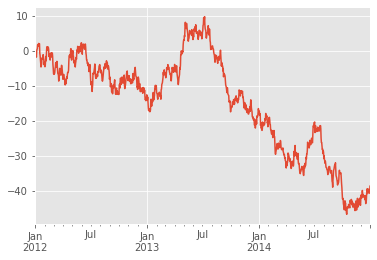

In [15]:
# tells pandas plots to use a default style
# which has a background fill
mpl.style.use('ggplot')
walk_ts.plot();

<p>The .plot() method on pandas objects is a wrapper function around the matplotlib
libraries’ plot() function. It makes plots of pandas data very easy to create. It is coded to
know how to use the data in the pandas objects to create the appropriate plots for the data,
handling many of the details of plot generation, such as selecting series, labeling, and axes
generation. In this situation, the .plot() method determines that as Series contains dates
for its index that the x axis should be formatted as dates and it selects a default color for
the data.</p><p>This example used a single series and the result would be the same using DataFrame with
a single column. As an example, the following produces the same graph with one small
difference. It has added a legend to the graph, which charts by default, generated from a
DataFrame object, will have a legend even if there is only one series of data:</p>

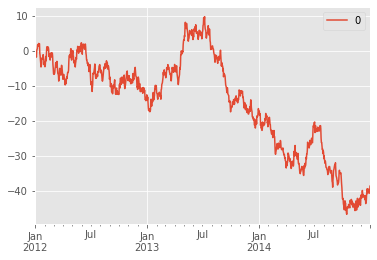

In [16]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

The .plot() function is smart enough to know whether DataFrame has multiple columns,
and it should create multiple lines/series in the plot and include a key for each, and also
select a distinct color for each line. This is demonstrated with the following example:

In [19]:
# generate two random walks, one in each of
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df

                    A         B
2012-01-01  -1.878324  1.362367
2012-01-02  -2.804186  1.427261
2012-01-03  -3.241758  3.165368
2012-01-04  -2.750550  3.332685
2012-01-05  -1.620667  2.930017
...               ...       ...
2014-12-27 -20.952692  4.689279
2014-12-28 -20.476150  3.965521
2014-12-29 -21.250542  4.243064
2014-12-30 -19.930892  6.237730
2014-12-31 -19.016886  3.836418

[1096 rows x 2 columns]

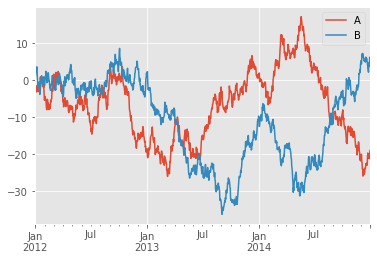

In [18]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

If you want to use one column of DataFrame as the labels on the x axis of the plot instead
of the index labels, you can use the x and y parameters to the .plot() method, giving the x
parameter the name of the column to use as the x axis and y parameter the names of the
columns to be used as data in the plot. The following recreates the random walks as
columns 'A' and 'B', creates a column 'C' with sequential values starting with 0, and
uses these values as the x axis labels and the 'A' and 'B' columns values as the two
plotted lines:

In [21]:
# copy the walk
df2 = walk_df.copy()

# add a column C which is 0 .. 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)

df2

                    A         B     C
2012-01-01  -1.878324  1.362367     0
2012-01-02  -2.804186  1.427261     1
2012-01-03  -3.241758  3.165368     2
2012-01-04  -2.750550  3.332685     3
2012-01-05  -1.620667  2.930017     4
...               ...       ...   ...
2014-12-27 -20.952692  4.689279  1091
2014-12-28 -20.476150  3.965521  1092
2014-12-29 -21.250542  4.243064  1093
2014-12-30 -19.930892  6.237730  1094
2014-12-31 -19.016886  3.836418  1095

[1096 rows x 3 columns]

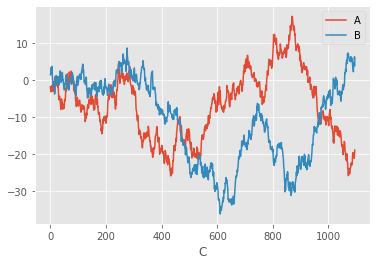

In [22]:
# instead of dates on the x axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);